<font size="5">**1. Data Exploration**</font>

<font size="4">**1.1 Import Packages**</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import shap

<font size="4">**1.2 Import Dataset**</font>

In [3]:
data = pd.read_csv("/Users/oliviama/Desktop/fraud_oracle.csv")

<font size="4">**1.3 Look At Data Structure**</font>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


<font size="4">**1.4 Check Missing Value**</font>

In [7]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

<font size="4">**1.5 Data Distribution**</font>

<font size="3">**1.5.1 Distribution of Target Variable**</font>

In [52]:
data["FraudFound_P"].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

<font size="3">**1.5.2 Data Distribution Of Categorical Variables**</font>

In [15]:
data["Month"].value_counts()

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64

In [16]:
data["DayOfWeek"].value_counts()

Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64

In [17]:
data["AccidentArea"].value_counts()

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

In [18]:
data["DayOfWeekClaimed"].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [19]:
data["MonthClaimed"].value_counts()

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64

In [20]:
data["Sex"].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

In [21]:
data["MaritalStatus"].value_counts()

Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

In [22]:
data["Fault"].value_counts()

Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64

In [23]:
data["PolicyType"].value_counts()

Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64

In [24]:
data["VehicleCategory"].value_counts()

Sedan      9671
Sport      5358
Utility     391
Name: VehicleCategory, dtype: int64

In [25]:
data["VehiclePrice"].value_counts()

20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: VehiclePrice, dtype: int64

In [26]:
data["Days_Policy_Accident"].value_counts()

more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64

In [27]:
data["Days_Policy_Claim"].value_counts()

more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: Days_Policy_Claim, dtype: int64

In [28]:
data["PastNumberOfClaims"].value_counts()

2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PastNumberOfClaims, dtype: int64

In [29]:
data["AgeOfVehicle"].value_counts()

7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64

In [30]:
data["AgeOfPolicyHolder"].value_counts()

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64

In [31]:
data["PoliceReportFiled"].value_counts()

No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64

In [32]:
data["WitnessPresent"].value_counts()

No     15333
Yes       87
Name: WitnessPresent, dtype: int64

In [33]:
data["AgentType"].value_counts()

External    15179
Internal      241
Name: AgentType, dtype: int64

In [34]:
data["NumberOfSuppliments"].value_counts()

none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: NumberOfSuppliments, dtype: int64

In [35]:
data["AddressChange_Claim"].value_counts()

no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: AddressChange_Claim, dtype: int64

In [36]:
data["NumberOfCars"].value_counts()

1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: NumberOfCars, dtype: int64

In [37]:
data["BasePolicy"].value_counts()

Collision     5962
Liability     5009
All Perils    4449
Name: BasePolicy, dtype: int64

<font size="3">**1.5.3 Data Distribution Of Numeric Variables**</font>

<AxesSubplot:>

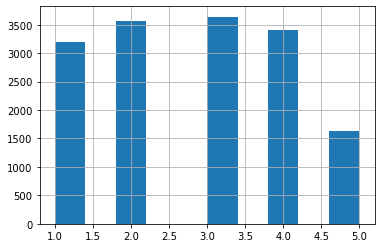

In [38]:
data["WeekOfMonth"].hist()

<AxesSubplot:>

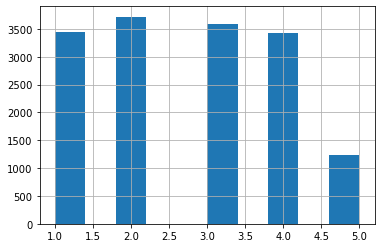

In [39]:
data["WeekOfMonthClaimed"].hist()

<AxesSubplot:>

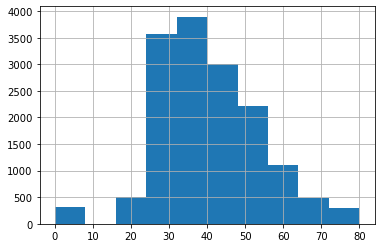

In [40]:
data["Age"].hist()

<AxesSubplot:>

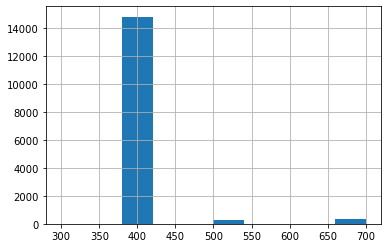

In [44]:
data["Deductible"].hist()

<AxesSubplot:>

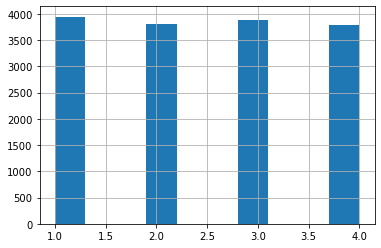

In [45]:
data["DriverRating"].hist()

<font size="4">**1.6 Outlier Detection**</font>

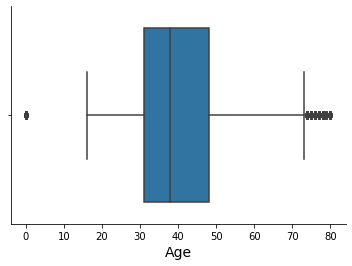

In [49]:
sns.boxplot(data['Age']) 
sns.despine()

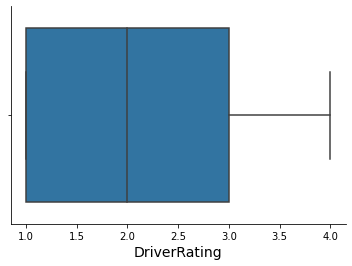

In [50]:
sns.boxplot(data['DriverRating']) 
sns.despine()

<font size="4">**1.7 Per-Predictor Relationship Detection**</font>

<font size="4">**1.7.1 Per-Predictor Relationship Detection of Numeric Variables**</font>

<AxesSubplot:xlabel='FraudFound_P', ylabel='WeekOfMonth'>

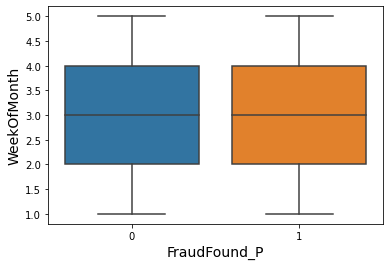

In [55]:
sns.boxplot(x='FraudFound_P', y='WeekOfMonth', data=data)

<AxesSubplot:xlabel='FraudFound_P', ylabel='WeekOfMonthClaimed'>

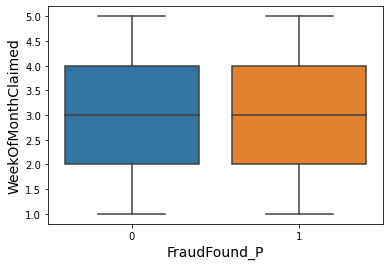

In [56]:
sns.boxplot(x='FraudFound_P', y='WeekOfMonthClaimed', data=data)

<AxesSubplot:xlabel='FraudFound_P', ylabel='Age'>

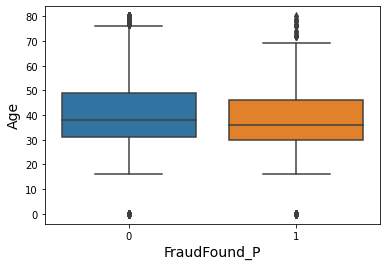

In [57]:
sns.boxplot(x='FraudFound_P', y='Age', data=data)

<AxesSubplot:xlabel='FraudFound_P', ylabel='RepNumber'>

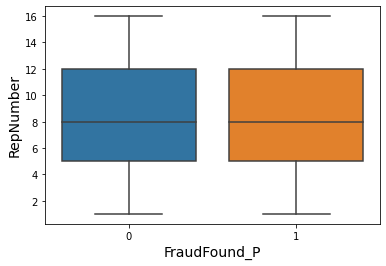

In [58]:
sns.boxplot(x='FraudFound_P', y='RepNumber', data=data)

<AxesSubplot:xlabel='FraudFound_P', ylabel='DriverRating'>

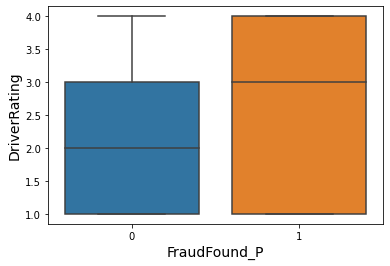

In [60]:
sns.boxplot(x='FraudFound_P', y='DriverRating', data=data)

<font size="4">**1.7.2 Per-Predictor Relationship Detection of Categorical Variables**</font>

<AxesSubplot:xlabel='Month'>

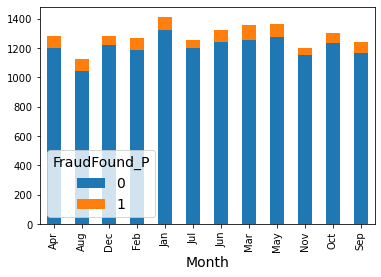

In [63]:
pd.crosstab(data['Month'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='DayOfWeek'>

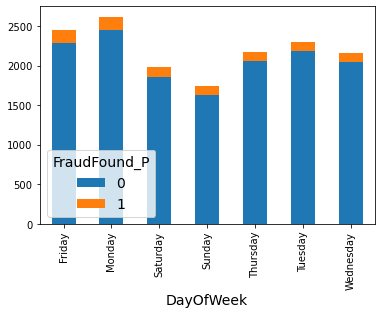

In [65]:
pd.crosstab(data['DayOfWeek'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='Make'>

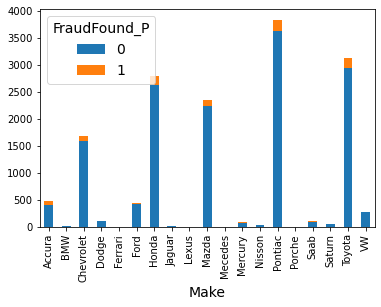

In [66]:
pd.crosstab(data['Make'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='AccidentArea'>

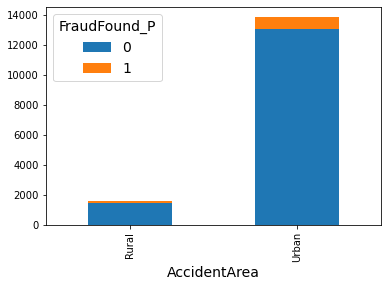

In [67]:
pd.crosstab(data['AccidentArea'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='DayOfWeekClaimed'>

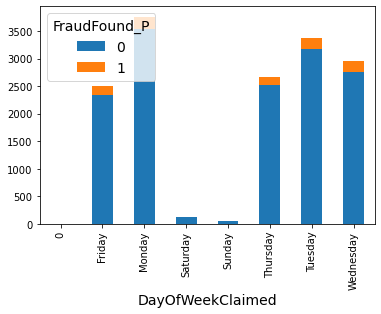

In [68]:
pd.crosstab(data['DayOfWeekClaimed'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='MonthClaimed'>

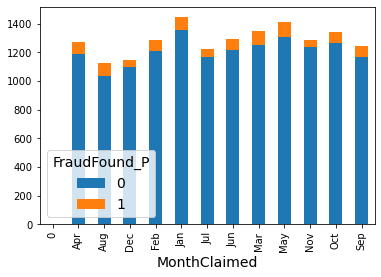

In [69]:
pd.crosstab(data['MonthClaimed'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='Sex'>

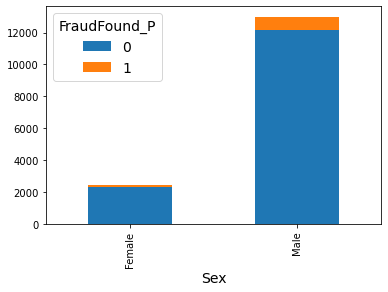

In [70]:
pd.crosstab(data['Sex'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='MaritalStatus'>

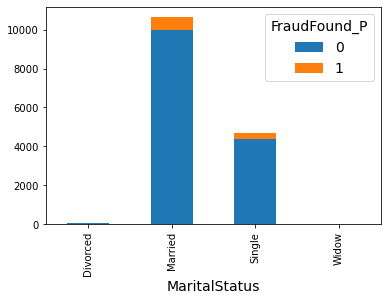

In [71]:
pd.crosstab(data['MaritalStatus'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='Fault'>

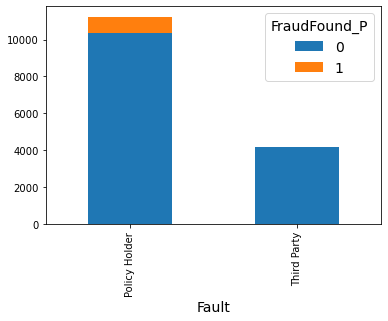

In [72]:
pd.crosstab(data['Fault'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='PolicyType'>

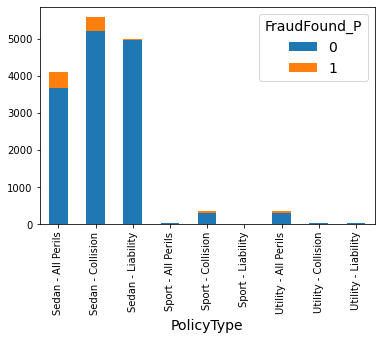

In [73]:
pd.crosstab(data['PolicyType'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='VehicleCategory'>

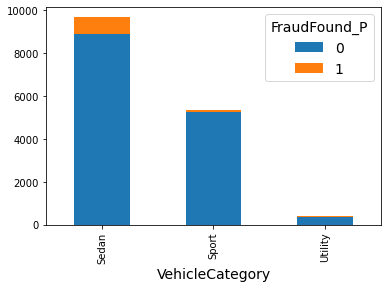

In [74]:
pd.crosstab(data['VehicleCategory'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='VehiclePrice'>

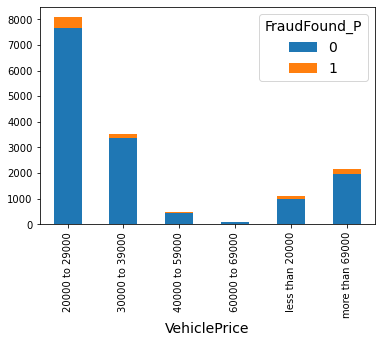

In [75]:
pd.crosstab(data['VehiclePrice'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='Days_Policy_Accident'>

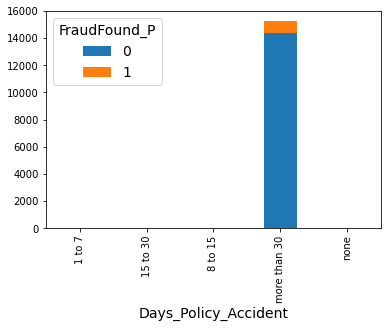

In [76]:
pd.crosstab(data['Days_Policy_Accident'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='Days_Policy_Claim'>

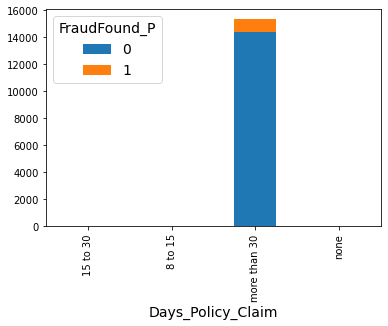

In [77]:
pd.crosstab(data['Days_Policy_Claim'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='PastNumberOfClaims'>

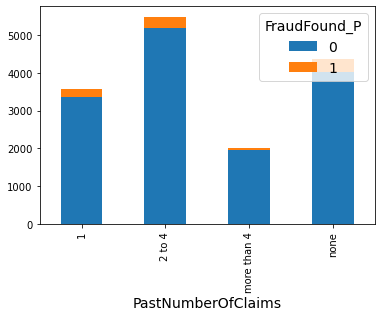

In [78]:
pd.crosstab(data['PastNumberOfClaims'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='AgeOfVehicle'>

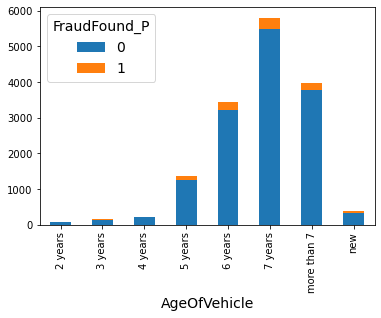

In [79]:
pd.crosstab(data['AgeOfVehicle'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='AgeOfPolicyHolder'>

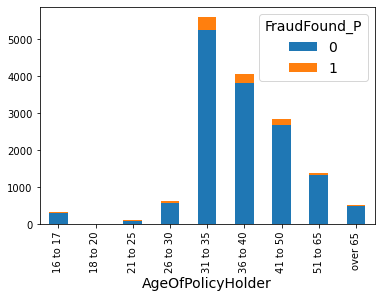

In [80]:
pd.crosstab(data['AgeOfPolicyHolder'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='PoliceReportFiled'>

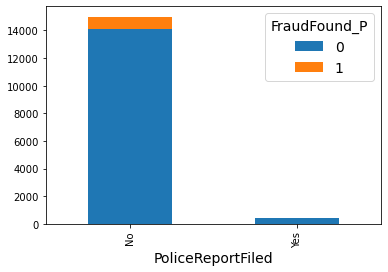

In [81]:
pd.crosstab(data['PoliceReportFiled'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='WitnessPresent'>

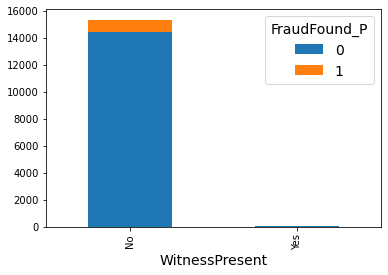

In [82]:
pd.crosstab(data['WitnessPresent'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='AgentType'>

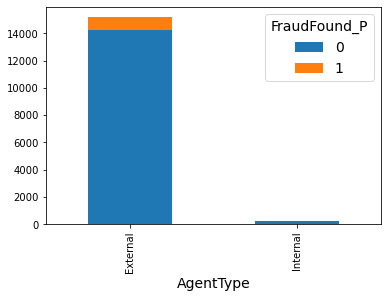

In [83]:
pd.crosstab(data['AgentType'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='NumberOfSuppliments'>

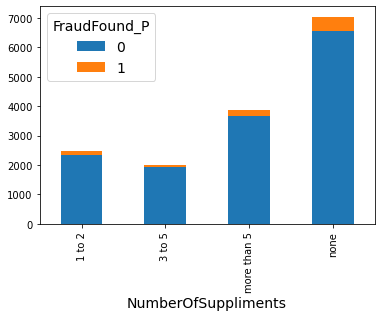

In [84]:
pd.crosstab(data['NumberOfSuppliments'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='AddressChange_Claim'>

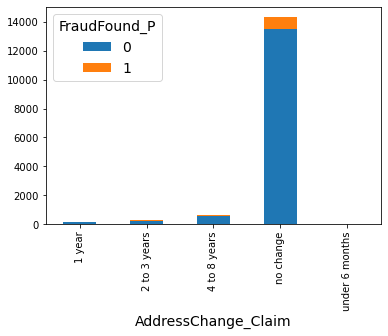

In [85]:
pd.crosstab(data['AddressChange_Claim'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='NumberOfCars'>

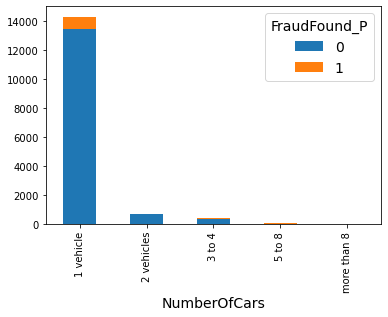

In [86]:
pd.crosstab(data['NumberOfCars'],data['FraudFound_P']).plot.bar(stacked=True)

<AxesSubplot:xlabel='BasePolicy'>

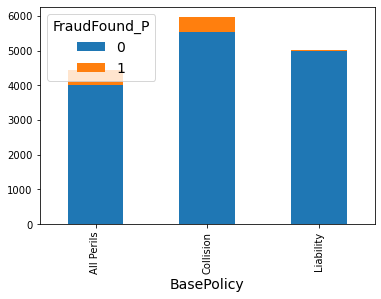

In [87]:
pd.crosstab(data['BasePolicy'],data['FraudFound_P']).plot.bar(stacked=True)

 <font size="4">**1.8 Check Variables' Correlations**</font>

In [88]:
data.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


<AxesSubplot:>

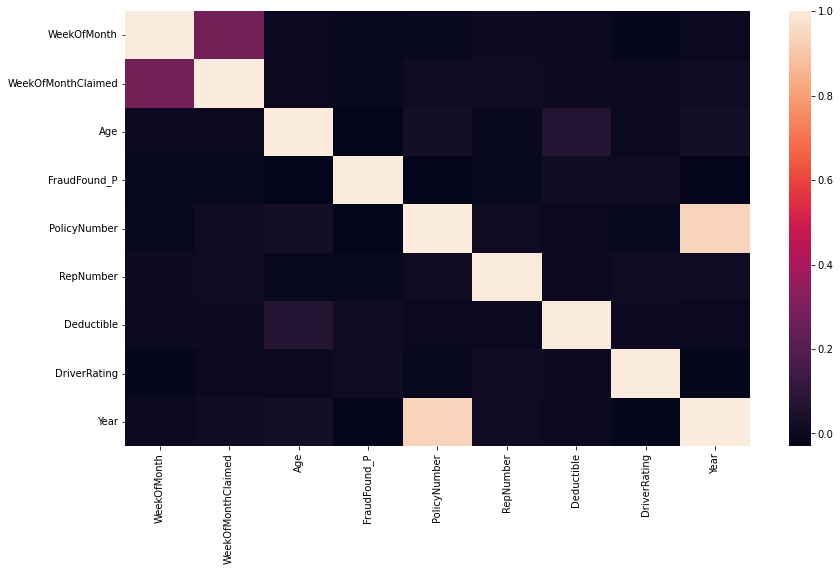

In [89]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr())